# 初めての信号処理
人工信号に対してFFT解析を行い、Numpy, Matplotlibの使い方を調べる

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from numpy import *
from matplotlib.pyplot import *

## 信号の生成
ランダムで選ばれた周波数を用いて、正弦波を足し合わせる。

In [3]:
# サンプリング周波数
fs = 16000
# 信号長さ[秒]
T = 1
# 時間配列を生成
t = np.linspace(0,T,fs)
# 信号のバッファ
S = np.zeros(fs)
# 足し合わせる信号の数
fn = 10

# 人工信号を生成
for i in range(fn):
    f = np.random.rand(1)*fs/2
    S = S+np.sin(2*np.pi*f*t)


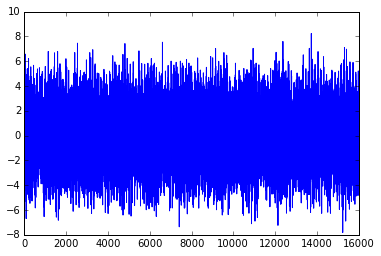

In [4]:
# 解析する信号の描画
plot(S)

## FFT解析
生成した人工信号を、numpy.fft(x)を使いfftをかける

In [5]:
S_fft = np.fft.fft(S)
S_fft_db = 20*np.log10(np.abs(S_fft))

N = len(S_fft_db)
w = t * fs

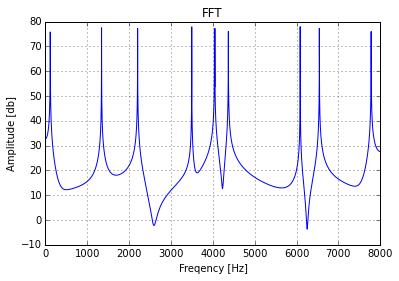

In [6]:
fig1 = figure()
ax1 = plot(w[:fs/2], S_fft_db[:fs/2])
grid()
title('FFT')
xlabel('Freqency [Hz]')
ylabel('Amplitude [db]')

## STFT


In [7]:
X = S
Nx = len(X)
frame_size = 512
overlap = frame_size/2
step_size = frame_size - overlap
window = np.hanning(frame_size)
maxframe = 5

### フレームを切り出す

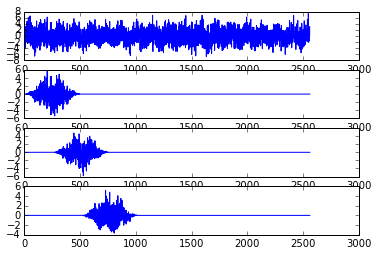

In [8]:

# Z = zeros(maxframe*frame_size)

X0 = X[0: 5*frame_size-1]
figure()

subplot(4,1,1)
plot(X0)

subplot(4,1,2)
step=0
ss = step*step_size
se = ss + frame_size
anadata = X0[ss:se] * window
X1 = zeros(maxframe*frame_size)
X1[ss:se] = anadata
plot(X1)

subplot(4,1,3)
step=1
ss = step*step_size
se = ss + frame_size
anadata=[]
anadata = X0[ss:se] * window
X2 = zeros(maxframe*frame_size)
X2[ss:se] = anadata
plot(X2)

subplot(4,1,4)
step=2
ss = step*step_size
se = ss + frame_size
anadata=[]
anadata = X0[ss:se] * window
X3 = zeros(maxframe*frame_size)
X3[ss:se] = anadata
plot(X3)

### 各フレーム毎にFFT解析を行う

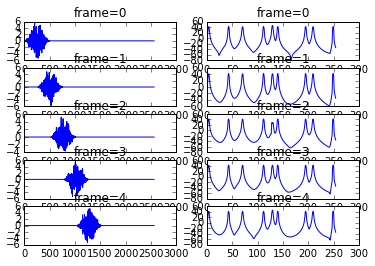

In [9]:
for n in range(maxframe):
    step = n
    subplot(maxframe, 2, 2*(n+1)-1)
    title('frame=%d' % (n) )
    ss = step*step_size
    se = ss + frame_size
    anadata=[]
    anadata = X0[ss:se]
    anadata = anadata * window
    X = zeros(maxframe*frame_size)
    X[ss:se] = anadata
    plot(X)
    
    subplot(maxframe, 2, 2*(n+1))
    title('frame=%d' % (n))
    XdBfft = 20*np.log10(np.abs(np.fft.fft(anadata)))
    plot(XdBfft[:frame_size/2-1])

## 窓の滑らかな接続を確認する
https://kevinsprojects.wordpress.com/2014/12/13/short-time-fourier-transform-using-python-and-numpy/

hamming窓の場合

(0, 1.5)

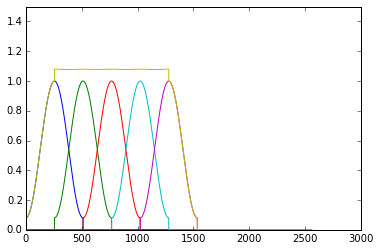

In [10]:
frame_size = 512
overlap = frame_size/2
step_size = frame_size - overlap
maxframe = 5

w_all = zeros(maxframe*frame_size)
for step in range(maxframe):
    ss = step*step_size
    se = ss + frame_size
    w = np.hamming(frame_size)
    w0 =np.zeros(maxframe * frame_size)
    w0[ss:se] = w
#     plot(20*np.log10(w0))
    plot(w0)
    w_all = w_all + w0
plot(w_all)
ylim(0,1.5)


hamming窓は、ハーフコサインをリフトアップしているので、合計値が1より大きくなるのがわかる。

(0, 1.5)

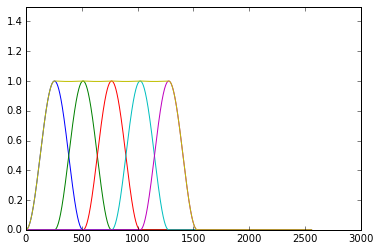

In [11]:
frame_size = 512
overlap = frame_size/2
step_size = frame_size - overlap
maxframe = 5

w_all = zeros(maxframe*frame_size)

for step in range(maxframe):
    ss = step*step_size
    se = ss + frame_size
    w = np.hanning(frame_size)
    w0 =np.zeros(maxframe * frame_size)
    w0[ss:se] = w
#     plot(20*np.log10(w0))
    plot(w0)
    w_all = w_all + w0
plot(w_all)
ylim(0,1.5)

hanning窓は0.5オーバーラップの時に合計値が1になる

## スペクトログラムの表示
matplotlibにはSTFTを行いスペクトログラムを表示するplot関数があるので使ってみる。


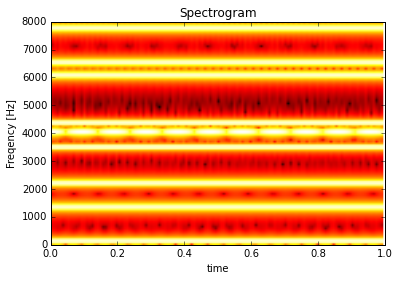

In [149]:
import matplotlib.mlab
X=S
pxx, freq, t, image = specgram(X, 
                               NFFT=256, 
                               Fs=fs , 
                               window=mlab.window_hanning,
                               noverlap=128,        
                               cmap="hot", 
                               xextent=None, 
                               pad_to=None, 
                               sides='default',
                               scale_by_freq=None,
                               mode='default')

title('Spectrogram')
xlabel('time')
ylabel('Freqency [Hz]')

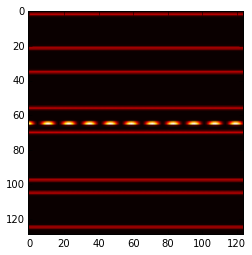

In [150]:
imshow(pxx, cmap="hot")

## STFTの再実装


In [147]:
X = S
Nx = len(X)
## STFTパラメータ
frame_size = 256
overlap = frame_size*(1./2.)
step_size = frame_size - overlap

maxframe = int((Nx-overlap)/step_size)
maxframe

124

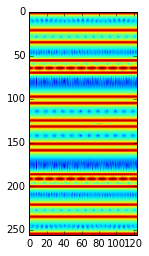

In [148]:
window = np.hanning(frame_size)
Spec = np.zeros([maxframe, frame_size])
for n in range(maxframe):
    step = n

    # 切り出すデータの区間
    ss = step*step_size
    se = ss + frame_size
    # データの切り出し
    x = X[ss:se] * window
    # FFT
    xfft = np.abs(np.fft.fft(x))
    
    Spec[n,:] = xfft[:fs/2-1]

Spec = 20*np.log10(Spec)
imshow(Spec.T)

imshowだと、要素数によりアスペクト比を決めてしまうため、時間方向の要素数がすくないとグラフが小さくなってしまう。その分Spectrogramは横軸も調整されていて、かつ目盛も正確で使いやすそうです。